In [47]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
import random
from matplotlib.colors import ListedColormap
import time

In [4]:
vars = {}
a = scipy.io.loadmat("./ex7/ex7data2.mat",vars)
X = vars['X']


In [5]:
X.shape


(300, 2)

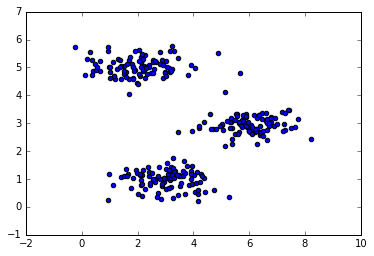

In [6]:
plt.scatter(X[:,0],X[:,1])

In [71]:
def k_means(dataset_input,clusters,iterations):
    plt.figure(figsize=(15,15))
    dataset = dataset_input.copy()
    clustar = random_initialize(dataset,clusters)
    colours = ('red','blue','cyan','gray','lightgreen','aqua','bisque','darkmagenta','gold','lightcoral')
    cmap = ListedColormap(colours[:clusters])
    for i in range(iterations):
        belonging = assign(dataset,clustar)
        clustar = new_centroids(dataset,belonging) 
    for position,ele in enumerate(dataset):
        plt.scatter(x=ele[0],y=ele[1],c=cmap(belonging[position]))
    plt.scatter(x=clustar[:,0],y=clustar[:,1], marker='x')
        
    

def random_initialize(dataset,clusters):
    random.seed()
    random_points=[]
    for i in range(clusters):
        curr_point = []
        for j in range(dataset.shape[1]):
            curr_point.append(random.uniform(dataset[:,j].min(),dataset[:,j].max()))
        random_points.append(curr_point)
    return np.array(random_points)


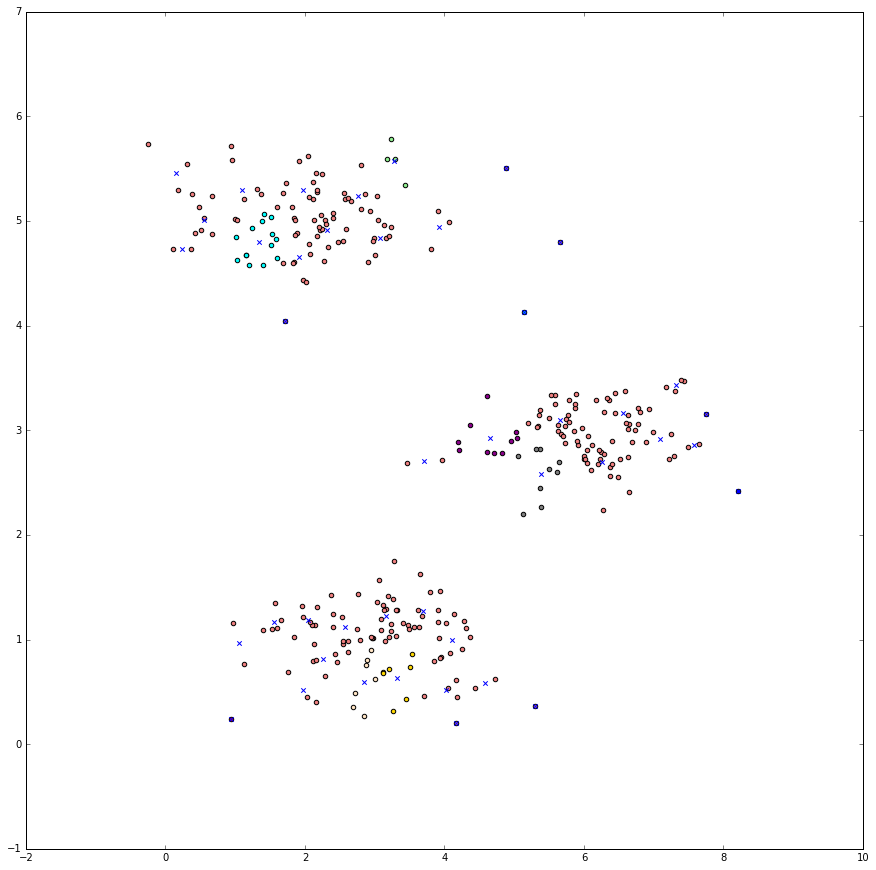

In [75]:
k_means(X,100,10)

In [51]:
def distances(example,clusters):
    dists = []
    return [euclid(example,one_cluster_centre) for one_cluster_centre in clusters]
    

def assign(dataset,clusters):
    assigned_clusters = []
    for example in dataset:
        curr_example_dists = distances(example,clusters)
        assigned_clusters.append(np.argmin(curr_example_dists))
    return assigned_clusters
        

def euclid(example,cluster):
    return np.sqrt(((cluster[0]-example[0])**2) + ((cluster[1]-example[1])**2))

def new_centroids(dataset,assigned_clusters):
    new_centroids = []
    for element in np.unique(assigned_clusters):
        belonging_examples = np.array([item for item in dataset if assigned_clusters[np.where(dataset==item)[0][0]] == element])
        mean_of_examples = np.mean(belonging_examples,axis=0)
        new_centroids.append(mean_of_examples)
    return np.array(new_centroids)
        

In [45]:
cl_tst= random_initialize(X,4)
cl_as = assign(X,cl_tst)
new_centroids(X,cl_as).shape

(4, 2)

In [13]:
colours = ('red','blue','cyan','gray')#,'lightgreen','aqua','bisque','darkmagenta','gold','lightcoral')
cmap = ListedColormap(colours)

In [14]:
clusters_test = random_initialize(X,4)
test_assign = assign(X,clusters_test)

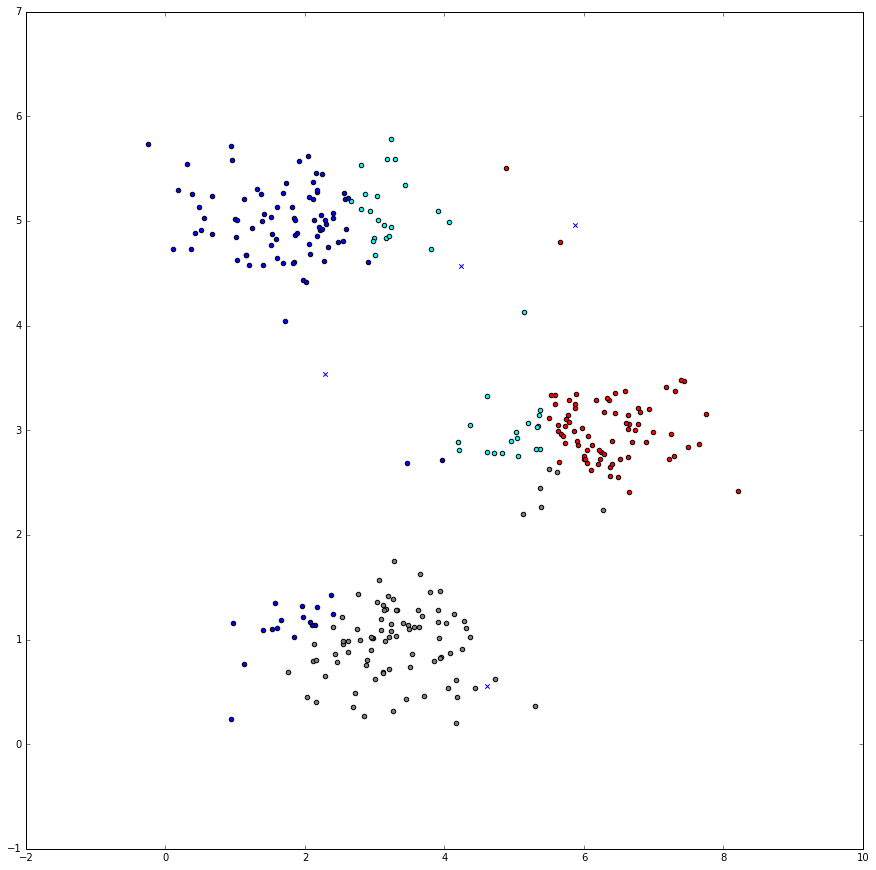

In [49]:
plt.figure(figsize=(15,15))
for position,ele in enumerate(X):
    plt.scatter(x=ele[0],y=ele[1],c=cmap(test_assign[position]))
plt.scatter(x=clusters_test[:,0],y=clusters_test[:,1], marker='x')
    

In [16]:
np.concatenate((np.array((1,2),ndmin=2),np.array((99,2),ndmin=2)),axis=0).shape

(2, 2)

In [25]:
np.unique([4,1,2,1,3])

array([1, 2, 3, 4])

In [23]:
qq = [[1,2],[1,2],[1,2]]
hallo = np.array(qq)
np.mean(hallo,)

1.5

In [39]:
krk = np.array([[1,2],[2,3]])
np.where(krk == [2,3])[0]

array([1, 1])

In [36]:
x = np.array([1,0,2,0,3,0,4,5,6,7,8])
np.where(x == 0)

(array([1, 3, 5]),)